> the Images Directional Recognition subproject of Auto Driving Project(apply on GTA5)

## Images(Data)

- label:
```python
# 'wasd' method on keyboard
key_dict = {
 '[0, 0, 0, 0, 0, 0, 0, 0, 0]': 'default',         # keep the current direction
 '[0, 0, 0, 0, 0, 0, 0, 0, 1]': 'NK',              # stop
 '[0, 0, 0, 0, 0, 0, 0, 1, 0]': 'SD',
 '[0, 0, 0, 0, 0, 0, 1, 0, 0]': 'SA',
 '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 'WD',
 '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 'WA',
 '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 'D',               # right
 '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 'A',               # left
 '[0, 1, 0, 0, 0, 0, 0, 0, 0]': 'S',               # back
 '[1, 0, 0, 0, 0, 0, 0, 0, 0]': 'W'                # straight
}
```

In [22]:
from copy import deepcopy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2                                        # OpenCV

### Data Importation

In [23]:
data_array = np.load(r'./Data/training_data-1.npy')
all_data = pd.DataFrame(data_array)

all_data.head(3)

,0,1
0,"[[[238, 204, 171], [246, 231, 216], [69, 55, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[[[238, 204, 171], [246, 231, 216], [69, 57, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"[[[238, 204, 171], [246, 231, 216], [69, 55, 4...","[0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [24]:
all_data.shape, all_data.iloc[0, 0].shape, len(all_data.iloc[0, 1])

((612, 2), (270, 480, 3), 9)

In [25]:
label_counter = pd.DataFrame(all_data[1].apply(str).value_counts())
label_counter.columns = ['cnt']

label_counter

,cnt
"[1, 0, 0, 0, 0, 0, 0, 0, 0]",177
"[0, 0, 0, 0, 0, 1, 0, 0, 0]",163
"[0, 0, 0, 0, 0, 0, 0, 0, 0]",148
"[0, 0, 0, 0, 1, 0, 0, 0, 0]",69
"[0, 0, 1, 0, 0, 0, 0, 0, 0]",41
"[0, 0, 0, 1, 0, 0, 0, 0, 0]",13
"[0, 0, 0, 0, 0, 0, 0, 1, 0]",1


### Display Original Images

In [26]:
# 'wasd' method on keyboard
key_dict = {
 '[0, 0, 0, 0, 0, 0, 0, 0, 0]': 'default',         # keep the current direction
 '[0, 0, 0, 0, 0, 0, 0, 0, 1]': 'NK',              # stop
 '[0, 0, 0, 0, 0, 0, 0, 1, 0]': 'SD',
 '[0, 0, 0, 0, 0, 0, 1, 0, 0]': 'SA',
 '[0, 0, 0, 0, 0, 1, 0, 0, 0]': 'WD',
 '[0, 0, 0, 0, 1, 0, 0, 0, 0]': 'WA',
 '[0, 0, 0, 1, 0, 0, 0, 0, 0]': 'D',               # right
 '[0, 0, 1, 0, 0, 0, 0, 0, 0]': 'A',               # left
 '[0, 1, 0, 0, 0, 0, 0, 0, 0]': 'S',               # back
 '[1, 0, 0, 0, 0, 0, 0, 0, 0]': 'W'                # straight
}

0-img	W 	 [1, 0, 0, 0, 0, 0, 0, 0, 0]


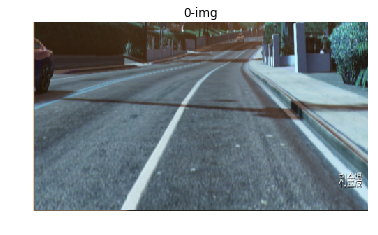

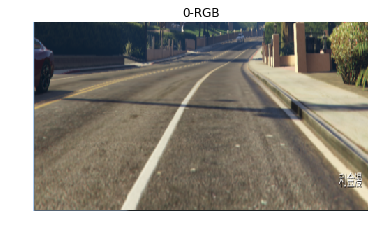

In [27]:
# display and index-appointed images(original or RGB format)
def show_get_corres_img(data_ary, idx, rgb=False, show=True, title=None):
    if title is None:
        title = str(idx)+'-img'
    
    # canvas initialized
    if show:
        plt.figure()
        plt.axis("off")
        plt.title(title)
    
    # convert color fromat or remain
    if rgb:
        rgb_img = cv2.cvtColor(data_ary[idx][0], cv2.COLOR_BGR2RGB)
        if show:
            plt.imshow(rgb_img)
        return rgb_img
    else: 
        if show:
            plt.imshow(data_ary[idx][0])
        return deepcopy(data_ary[idx][0])
    
show_get_corres_img(data_array, 0)
show_get_corres_img(data_array, 0, rgb=True, title='0-RGB')
    
    
# print and return index-appointed label
def show_get_corres_lable(data_ary, idx, title=True):
    label_s, label_l = key_dict[str(data_ary[idx][1])], data_ary[idx][1]
    if title:
        title = str(idx)+'-img'
        print(title,end='\t') 
        print(label_s, '\t', label_l)
    return label_s, deepcopy(label_l)
show_get_corres_lable(data_array, 0)

def show_raw_img(img, title=None):
    plt.figure()
    plt.axis('off')
    if title:
        plt.title(title)
    plt.imshow(img)

### Display by win

In [28]:
# display on window
def display_image_win(pos,img):
    cv2.imshow(pos, img)

# close window
def destroy_win():    
    while True:
        #if cv2.waitKey(25) & 0xFF == ord('q'):
        if cv2.waitKey(0) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

## Images Processing

In [29]:
show_idx = 1

bgr_img = show_get_corres_img(data_array, idx=show_idx, show=False) 
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
bgr_label = show_get_corres_lable(data_array, idx=show_idx, title=None) 

### Patial Extraction

In [30]:
# only extracte part of original image(270*480)--> To delete watermark
def get_masked(filter_img, vertices):
    # mask init
    mask = np.zeros_like(filter_img)
    
    # fill the mask with vertices matrix
    cv2.fillPoly(mask, vertices, 255)
    
    # bitwise 'and' calculation
    masked_img = cv2.bitwise_and(filter_img, mask)
    
    return masked_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


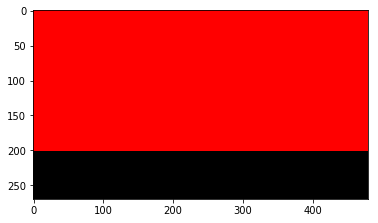

In [31]:
# commonly used ploygon
rectangle_ary = np.array([[0,0],
                          [0,200],
                          [800,200],
                          [800,0]], np.int32)

line_ary = np.array([[400,400],   # yellow, yellow
                     [100,100],   # purple, purple
                     [200,200],   # blue  , blue
                     [300,300]],  # green , green
                    np.int32)

# show used mask matrix
# mask = np.zeros((800, 400, 3))
mask = np.zeros((270, 480, 3))
cv2.fillPoly(mask, [rectangle_ary], (255, 0, 0))

plt.figure()
plt.imshow(mask)

### Search Boundary

In [32]:
# get a image with boundary mark after Gaussian Blur operation
def get_pro_img_lines(rgb_img):
    # gray graph
    gray_img = cv2.cvtColor(rgb_img, 
                            cv2.COLOR_BGR2GRAY)      
    
    # search boundarywith Canny algorithm
    processed_img = cv2.Canny(gray_img, 
                              threshold1=48,               # low threshold
                              threshold2=338)              # high rhreshold
    
    # Gaussian Blur
    processed_img = cv2.GaussianBlur(processed_img, 
                                     (3,3),                # Gaussian kernel size
                                     0)                    # Gaussian kernel standard deviation in X direction
    
    # get line segments with the probabilistic Hough transform.
    lines = cv2.HoughLinesP(processed_img,
                            rho = 1.0, 
                            theta = np.pi/180, 
                            threshold = 120,        # Accumulator threshold
                            minLineLength = 100,     # Minimum line length
                            maxLineGap = 30)        # Maximum allowed gap between points on the same line
    
    return processed_img, lines

In [33]:
# get processed image(complete processing)
def get_cplt_proc_img(img):
    # search boundarywith Canny algorithm
    processed_img = cv2.Canny(gray_img, 
                              threshold1=48,               # low threshold
                              threshold2=338)              # high rhreshold
    
    # Gaussian Blur
    processed_img = cv2.GaussianBlur(processed_img, 
                                     (3,3),                # Gaussian kernel size
                                     0)                    # Gaussian kernel standard deviation in X direction
    
    processed_img = get_masked(processed_img, [rectangle_ary])         # partial extraction
    
    return processed_img

(<matplotlib.axes._subplots.AxesSubplot at 0x19547a58>,
 Text(0.5,1,'gray-gray'),
 (-0.5, 479.5, 269.5, -0.5))

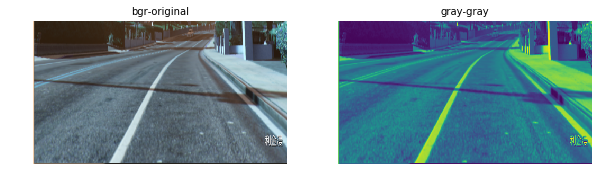

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(bgr_img),plt.title('bgr-original', fontsize = 10),plt.axis("off") 
plt.subplot(122), plt.imshow(gray_img),plt.title('gray-gray', fontsize = 10),plt.axis("off") 

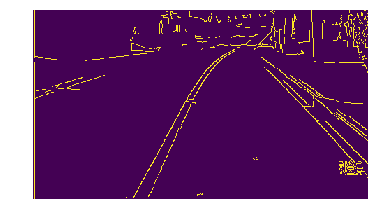

In [35]:
# show line found image 
show_raw_img(cv2.Canny(bgr_img, threshold1=200, threshold2=300))

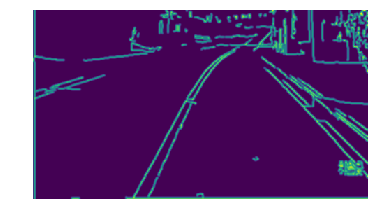

In [36]:
# show line found image which after the Gaussian Blur operation
_pro_img = cv2.Canny(bgr_img, threshold1=200, threshold2=300)
_pro_img = cv2.GaussianBlur(_pro_img, (5,5), 0)

show_raw_img(_pro_img)

In [37]:
_pro_img.shape

(270, 480)

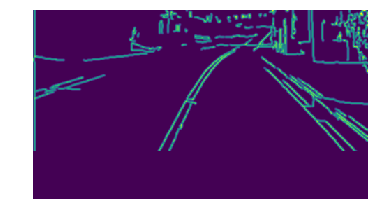

In [38]:
# show line found image which after the Gaussian Blur operation and mask extraction
_pro_img = cv2.Canny(bgr_img, threshold1=200, threshold2=300)
_pro_img = cv2.GaussianBlur(_pro_img, (5,5), 0)

_pro_img = get_masked(_pro_img, [rectangle_ary])                       

show_raw_img(_pro_img)

(<matplotlib.axes._subplots.AxesSubplot at 0x1a37fba8>,
 Text(0.5,1,'img_gray'),
 (-0.5, 479.5, 269.5, -0.5))

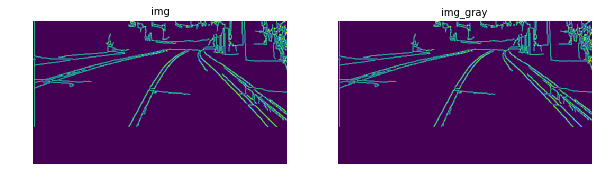

In [39]:
_pro_img = get_cplt_proc_img(bgr_img)
_pro_img_gray = get_cplt_proc_img(gray_img)

plt.figure(figsize=(10,6))
plt.subplot(121), plt.imshow(_pro_img),plt.title('img', fontsize = 10),plt.axis("off") 
plt.subplot(122), plt.imshow(_pro_img_gray),plt.title('img_gray', fontsize = 10),plt.axis("off") 

### Draw lines(Result Description)

In [40]:
# draw thick black lines ony by one on images
def draw_lines(img,lines,color=[255,255,255],width=8):
    for line in lines:
        coords = line[0]
        cv2.line(img, 
                 (coords[0], coords[1]),     # first point
                 (coords[2], coords[3]),     # second point
                 [255,255,255],              # line color
                 8)                          # thickness

(<matplotlib.axes._subplots.AxesSubplot at 0x1997acf8>,
 Text(0.5,1,'draw_lines'),
 (-0.5, 479.5, 269.5, -0.5))

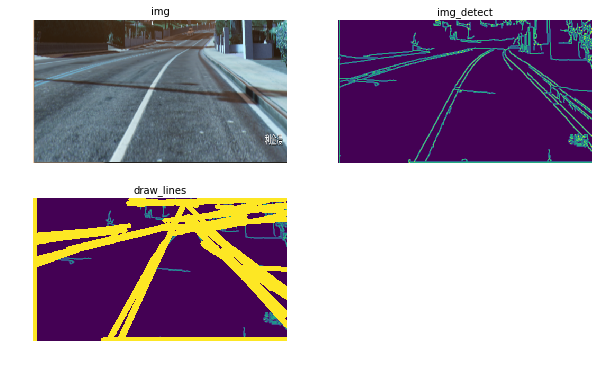

In [41]:
_pro_img, _lines= get_pro_img_lines(bgr_img)                # get processed image and lines

plt.figure(figsize=(10,6))
plt.subplot(221), plt.imshow(bgr_img),plt.title('img', fontsize = 10),plt.axis("off")
plt.subplot(222), plt.imshow(_pro_img),plt.title('img_detect', fontsize = 10),plt.axis("off") 
draw_lines(_pro_img,_lines)                      # 在detect图片上画出标记的边界（方便比较）
plt.subplot(223), plt.imshow(_pro_img),plt.title('draw_lines', fontsize = 10),plt.axis("off") 

## Color Density
- Understanding Boundary Density by Color Frequency Distribution

- reference link: [tutorial_py_colorspaces](https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html)---[image-of-hsv-color-wheel-for-opencv](https://stackoverflow.com/questions/21737613/image-of-hsv-color-wheel-for-opencv)


### Color Area Extraction

In [42]:
# return selected yellow/white area
def extract_with_colorBGR(org_img):
    # HSV: Hue, Saturation, Value
    hsv = cv2.cvtColor(org_img, cv2.COLOR_BGR2HSV)                       

    # threshold-yellow
    lower_yellow = np.array([15, 100, 100])
    upper_yellow = np.array([45,255,255])
    
    # threshold-white
    lower_white = np.array([0, 0, 0])
    upper_white = np.array([100,0,255])


    # only remain the value of between threshods 
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    white_mask = cv2.inRange(hsv, lower_white, upper_white)

    # bitwise 'and' calculation
    res_yellow = cv2.bitwise_and(org_img, org_img, mask= yellow_mask)
    res_white = cv2.bitwise_and(org_img, org_img, mask= white_mask)
    
    return yellow_mask, white_mask, res_yellow, res_white

<class 'numpy.ndarray'> (270, 480, 3)


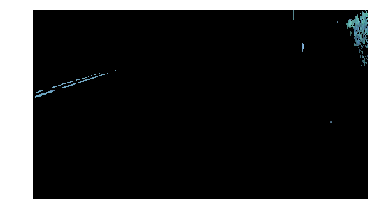

In [48]:
# threshold-yellow
hsv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)                   

lower_yellow = np.array([15, 100, 100])
upper_yellow = np.array([45,255,255])

yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

print(type(bgr_img), bgr_img.shape)
res_yellow = cv2.bitwise_and(bgr_img, bgr_img, mask= yellow_mask)

show_raw_img(res_yellow)

<class 'numpy.ndarray'> (270, 480)


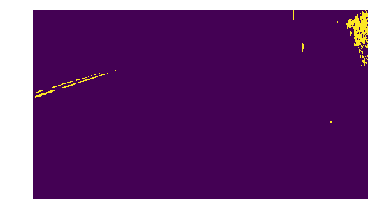

In [49]:
print(type(yellow_mask), yellow_mask.shape)

show_raw_img(get_masked(yellow_mask, [rectangle_ary]))